In [1]:
# Import Data Manipulation Library
import numpy as np
import pandas as pd
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Libraries
# Filterwarning :---> This Will Hide Alll Warning Messages 
import warnings
warnings.filterwarnings('ignore')
# Import Data Logging
import logging
logging.basicConfig(level=logging.INFO,
                    filemode = 'w',
                    filename= 'app.log',
                    format= '%(asctime)s - %(levelname)s - %(message)s')

In [2]:
logging.info('Please Upload Dataset for EDA...')

In [3]:
data = pd.read_csv('bank-full.csv',sep = ';')

In [4]:
logging.info('The Dataset is Successfully Uploaded')

In [5]:
# Import Data Sample
data.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28748,31,services,married,secondary,no,288,no,no,cellular,30,jan,164,1,-1,0,unknown,no
8440,37,blue-collar,married,primary,no,1534,yes,no,unknown,3,jun,126,4,-1,0,unknown,no
34370,33,management,married,tertiary,no,0,yes,no,telephone,4,may,33,7,-1,0,unknown,no
5174,32,blue-collar,married,secondary,no,783,yes,no,unknown,21,may,923,3,-1,0,unknown,yes
44597,29,student,single,secondary,no,1124,no,no,unknown,24,aug,26,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38515,49,blue-collar,married,secondary,no,1230,yes,yes,cellular,15,may,167,2,373,3,failure,no
15104,58,admin.,married,secondary,no,1813,yes,no,telephone,17,jul,15,1,-1,0,unknown,no
40780,44,management,divorced,tertiary,no,0,no,no,cellular,10,aug,71,1,-1,0,unknown,no
37063,28,blue-collar,single,secondary,yes,-2,yes,yes,cellular,13,may,172,2,364,5,failure,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Data Insights:

1. The Dataset Contains 45211 Rows and 17 Columns

2. Seven Numerical Columns and 10 Categorical Columns We have, Outof Which y is the target Column.

3. Based on Descriptive Statistics, The Data is Non Normal Distributed.

4. As y is our Target Column, This Column shows Data Imbalance.

In [7]:
logging.info('The Dataset Contains 45211 Rows and 17 Columns')

logging.info('Data Split Into Numerical_Data and Categorical_Data')

In [8]:
# Split the Dataset into Categorical and Numerical

Numerical_data = data.select_dtypes(exclude = 'object')

Categorical_data = data.select_dtypes(include = 'object')

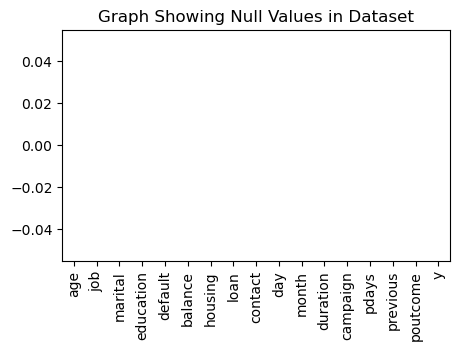

In [9]:
# Checking Null Values if any
plt.figure(figsize = (5,3))
data.isnull().sum().plot(kind= 'bar')
plt.title('Graph Showing Null Values in Dataset')
plt.show()

In [13]:
# Performing Univariate Analysis
from collections import OrderedDict

stats = []

for i in Numerical_data.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Minimum': Numerical_data[i].min(),
        'Maximum': Numerical_data[i].max(),
        'Mean': Numerical_data[i].mean(),
        '25%': Numerical_data[i].quantile(0.25),
        '50%': Numerical_data[i].quantile(0.50),
        '75%': Numerical_data[i].quantile(0.75),
        'Kurtosis': Numerical_data[i].kurt(),
        'Skewness': Numerical_data[i].skew(),
        'Standard Deviation': Numerical_data[i].std()
    })

    stats.append(numerical_stats)
report = pd.DataFrame(stats)

report

,Feature,Minimum,Maximum,Mean,25%,50%,75%,Kurtosis,Skewness,Standard Deviation
0,age,18,95,40.936210,33.0,39.0,48.0,0.319570,0.684818,10.618762
1,balance,-8019,102127,1362.272058,72.0,448.0,1428.0,140.751547,8.360308,3044.765829
2,day,1,31,15.806419,8.0,16.0,21.0,-1.059897,0.093079,8.322476
3,duration,0,4918,258.163080,103.0,180.0,319.0,18.153915,3.144318,257.527812
4,campaign,1,63,2.763841,1.0,2.0,3.0,39.249651,4.898650,3.098021
5,pdays,-1,871,40.197828,-1.0,-1.0,-1.0,6.935195,2.615715,100.128746
6,previous,0,275,0.580323,0.0,0.0,0.0,4506.860660,41.846454,2.303441


In [ ]:
# Performing Univariate Analysis
from collections import OrderedDict

stats_cat = []

for i in Categorical_data:
    Categorical_stats = OrderedDict({
        'Feature':i,
        'Unique': Categorical_data[i].nunique()    
    })

    stats_cat.append(Categorical_stats)
report1 = pd.DataFrame(stats_cat)

report1

,Feature,Unique
0,job,12
1,marital,3
2,education,4
3,default,2
4,housing,2
5,loan,2
6,contact,3
7,month,12
8,poutcome,4
9,y,2


In [26]:
Categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [30]:
columns = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']

for i in columns:
    print(Categorical_data[i].value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
default
no     44396
yes      815
Name: count, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
loan
no     37967
yes     7244
Name: count, dtype: int64
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
poutcome
unknown    36959
failure     4901
other  